In [ ]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Code

1.  Apply tSNE to MNIST using any library that you want (not from scratch.)
2.  Plot the result.

Loading data...
... data has been loaded!


<ipython-input-3-29116733993b>:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y.astype(int), cmap=plt.cm.get_cmap("jet", 10), s=10)


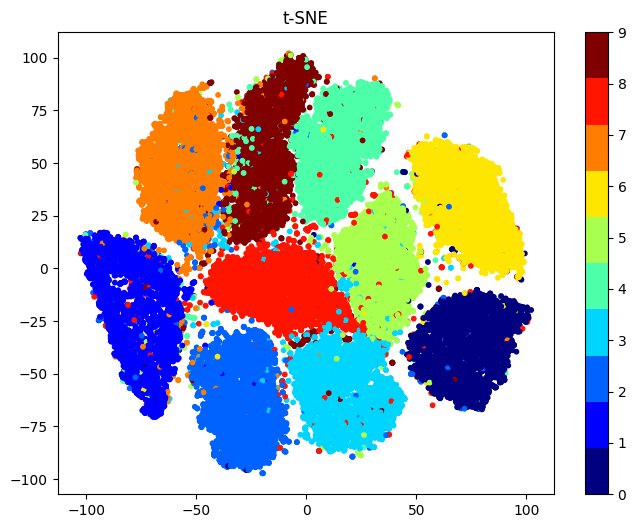

In [3]:
# Code here
# reference from https://gaussian37.github.io/ml-concept-t_sne/
# colormap: https://wikidocs.net/141538

import os
import urllib.request
import gzip
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# from Homework1
def load_data(dataset):
  if not os.path.isfile(dataset):
    origin = (
      'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print('Downloading data from %s' % origin)
    urllib.request.urlretrieve(origin, dataset)
  print('Loading data...')

  with gzip.open(dataset, 'rb') as f:
    try:
      train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    except:
      train_set, valid_set, test_set = pickle.load(f)
  print('... data has been loaded!')

  return train_set, valid_set, test_set

# 1) Load the MNIST dataset as in Homework6
dataset_file = 'mnist.pkl.gz'
train_set, _, _ = load_data(dataset_file)
x, y = train_set # data, label

tsne = TSNE(n_components=2, perplexity=30)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(8,6))
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y.astype(int), cmap=plt.cm.get_cmap("jet", 10), s=10)
plt.colorbar()
plt.title("t-SNE")
plt.show()

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you provide the code to compute the tSNE for the MNIST dataset?
2.   (If not provided automatically in the previous prompt:) Can you plot the results?


**Paste the answer provided and run the code below:**

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-1-22772c443e51>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("jet", 10))


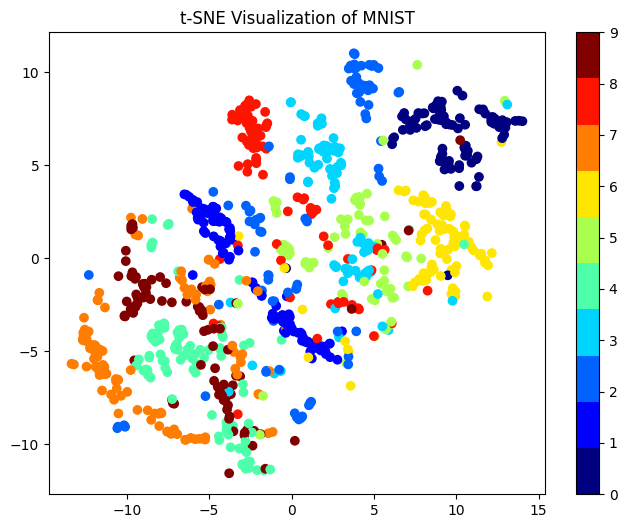

In [1]:
#paste the code here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Select a subset of the data to speed up the t-SNE computation (optional)
subset_size = 1000
X = mnist.data[:subset_size]
y = mnist.target[:subset_size]

# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)

# Compute t-SNE representation
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.astype(int), cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()
plt.title("t-SNE Visualization of MNIST")
plt.show()


# Report


1.   What are some differences you notice between your code and ChatGPT's? (Name at least 2)

1) GPT may have been concerned about cost, so only 1,000 were selected as a subset and trained. Even at a glance, it was not clearly divided. I trained all 30,000 values without a separate subset. It took 13 minutes, much longer than the 45 seconds for the GPT code, but the classfication was done well.

2) As in 1, GPT, concerned about cost, set the iteration to 300. I set it to the default of 1000. The maximum number of repetitions was determined because the default option is to stop learning if the learning effect is small enough.

---

2.   Ask ChatGPT What are the advantages and disadvantages of using tSNE in a dataset. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?

> GPT Response :
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a powerful dimensionality reduction technique commonly used for data visualization and exploratory data analysis. Like any method, it has its own set of advantages and disadvantages:
**Advantages of t-SNE:**
1. **Non-linearity:** t-SNE is capable of capturing non-linear relationships in data. It can reveal complex structures and patterns that might be hidden in high-dimensional spaces.
2. **Visualization:** It is particularly well-suited for visualizing high-dimensional data in 2D or 3D space. It helps users explore and understand data more effectively.
3. **Cluster Preservation:** t-SNE often effectively preserves the local and global structures of data, making it a good choice when dealing with clustering and density estimation tasks.
4. **Noise Robustness:** It is relatively robust to noisy data because it focuses on preserving the relative distances between data points rather than the exact distances.
**Disadvantages of t-SNE:**
1. **Stochastic Nature:** t-SNE is a stochastic algorithm. It can produce different results in different runs, making it difficult to compare or reproduce results exactly.
2. **Computationally Intensive:** t-SNE can be computationally expensive, especially for large datasets. This makes it less practical for very large datasets.
3. **No Global Structure:** While t-SNE is excellent at preserving local structure, it may not effectively capture global structure. It may lead to crowding issues where some clusters overlap.
4. **Parameter Sensitivity:** t-SNE has hyperparameters (e.g., perplexity) that can significantly impact the results. Finding the right parameters for a specific dataset may require some trial and error.
5. **Curse of Dimensionality:** Like other dimensionality reduction techniques, t-SNE can suffer from the "curse of dimensionality," where it becomes less effective as the dimensionality of the data increases.
6. **Interpretability:** While t-SNE is great for visualization, the transformed lower-dimensional space may not always be directly interpretable, which can be a drawback if you need to understand the meaning of the reduced dimensions.<br><br>
In summary, t-SNE is a valuable tool for data exploration and visualization, especially when dealing with high-dimensional data. However, it's important to be aware of its limitations and carefully consider when and how to use it in your data analysis workflow. It may not always be the best choice, and alternative dimensionality reduction techniques should be considered based on your specific needs and dataset characteristics.

 Yes, t-SNE is a non-linear dimensionality reduction method and is particularly good at visualizing high-dimensional data sets. t-SNE is used for visualization in various fields. The t-SNE algorithm calculates the similarity of points in a high-dimensional space and the corresponding similarity of points in a low-dimensional space. The similarity of points is calculated as the conditional probability that point A will choose point B as its neighbor if neighbors are selected proportional to the probability density from a normal distribution centered on A.And it attempts to minimize the difference between these conditional probabilities (or similarities) in high- and low-dimensional spaces in order to perfectly represent the data points in low-dimensional space. To minimize the sum of the differences in conditional probabilities, t-SNE uses a gradient descent method to minimize the sum of the KL-divergence of all data points.<br>
 However, after the t-SNE process, it is difficult to check the input feature. And it is difficult to infer something based only on t-SNE results. Therefore, t-SNE is mainly used as a visualization tool.

---

4.   Conclude with some thoughts and things you learned from this homework.

In this homework, we covered the concept of t-SNE and how to use it to reduce the dimensionality of data for visualization purposes.
However, it's essential to understand its strengths and weaknesses to use it.
Tuning parameter and Interpreting carefully the t-SNE results would be a key point of good application or work.